# Part I: Data Preparation

## Read data from csv

In [1]:
import pandas as pd

DATA_DIR = 'data'
CSV_FILE = DATA_DIR + '/KaggleV2-May-2016.csv'
#CSV_FILE = DATA_DIR + '/KaggleV2-May-2016-small.csv'

appt_df = pd.read_csv(CSV_FILE)

#appt_df.head()

## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle
- Transform categorical variables into numeric variable

In [2]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df

In [3]:
clean_appt_df = appt_df.copy()

#remove invalid data
invalid_age_df = clean_appt_df.loc[clean_appt_df['Age'] < 0]
clean_appt_df = clean_appt_df[~clean_appt_df.isin(invalid_age_df)].dropna()

#reformat date time data
clean_appt_df['ScheduledDay'] = pd.to_datetime( clean_appt_df['ScheduledDay'].str.replace('T', ' ').str.replace('Z', ''))
clean_appt_df['AppointmentDay'] = pd.to_datetime( clean_appt_df['AppointmentDay'].str.replace('T', ' ').str.replace('Z', ''))

#rename column name 
clean_appt_df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)
clean_appt_df.rename(columns = {'Handcap':'Handicap'}, inplace = True)

clean_appt_df['Medium_Age'] = clean_appt_df['Age'].mean()

#Transform categorical variables into numeric variable
clean_appt_df['No-showTrans'] = clean_appt_df['No-show'].map({'Yes': 1, 'No': -1})
clean_appt_df['GenderTrans'] = clean_appt_df['Gender'].map({'M': 1, 'F': 0})

#clean_appt_df.head()
clean_appt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null float64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null float64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null float64
Hypertension      110526 non-null float64
Diabetes          110526 non-null float64
Alcoholism        110526 non-null float64
Handicap          110526 non-null float64
SMS_received      110526 non-null float64
No-show           110526 non-null object
Medium_Age        110526 non-null float64
No-showTrans      110526 non-null int64
GenderTrans       110526 non-null int64
dtypes: datetime64[ns](2), float64(10), int64(2), object(3)
memory usage: 15.2+ MB


In [4]:
clean_appt_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Medium_Age,No-showTrans,GenderTrans
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,1.105260e+05,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,3.708922e+01,-0.596131,0.350026
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,6.394914e-11,0.802891,0.476980
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.708922e+01,-1.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.708922e+01,-1.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.708922e+01,-1.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.708922e+01,-1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.708922e+01,1.000000,1.000000


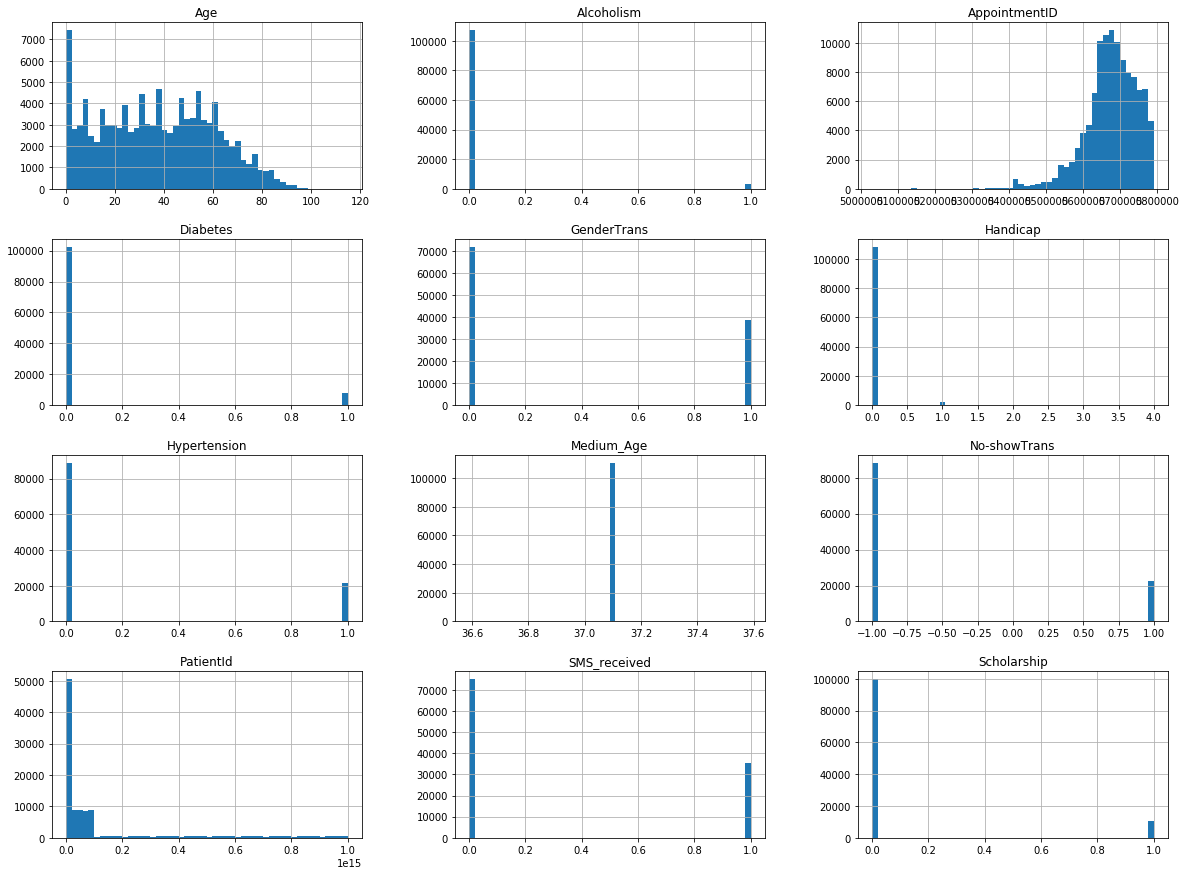

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
clean_appt_df.hist(bins=50, figsize=(20,15))
plt.show()

## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [6]:
import os

PROCESSED_DATA_DIR = 'processed_data'
if not os.path.isdir(PROCESSED_DATA_DIR):
    os.mkdir(PROCESSED_DATA_DIR)

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

In [7]:
import numpy as np

clean_appt_df["Age_cal"] = np.ceil(clean_appt_df["Age"]/clean_appt_df["Medium_Age"] / 0.5)
clean_appt_df["Age_cal"].where(clean_appt_df["Age_cal"] < 5, 5.0, inplace=True)

In [8]:
clean_appt_df["Age_cal"].value_counts() / len(clean_appt_df)

2.0    0.246548
3.0    0.243436
1.0    0.229150
4.0    0.195140
5.0    0.053707
0.0    0.032020
Name: Age_cal, dtype: float64

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

test_size = 1.0 * (20000 / len(clean_appt_df))

split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=1234)
for train_index, test_index in split.split(clean_appt_df, clean_appt_df["No-show"]):
    train_set = clean_appt_df.loc[train_index]
    test_set = clean_appt_df.loc[test_index]
    
train_set["No-show"].value_counts() / len(train_set)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


No     0.798003
Yes    0.201986
Name: No-show, dtype: float64

In [10]:
# Verify Test size
len(test_set)

20000

In [11]:
test_set["No-show"].value_counts() / len(test_set)

No     0.7983
Yes    0.2017
Name: No-show, dtype: float64

In [12]:
# remove classification related columns
for set in (train_set, test_set):
    set.drop(["Age_cal"], axis=1, inplace=True)
    set.drop(["Medium_Age"], axis=1, inplace=True)

In [13]:
train_set.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No-showTrans,GenderTrans
65404,1.488564e+13,5546731.0,F,2016-04-05 17:14:48,2016-05-16,7.0,JARDIM CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,Yes,1.0,0.0
28379,9.129977e+12,5625339.0,F,2016-04-27 07:08:52,2016-05-02,66.0,REDENÇÃO,0.0,1.0,0.0,0.0,0.0,1.0,No,-1.0,0.0
88543,8.188634e+13,5763694.0,F,2016-06-02 09:17:53,2016-06-03,70.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No,-1.0,0.0
440,8.366249e+13,5639495.0,F,2016-04-29 09:09:55,2016-04-29,25.0,SÃO BENEDITO,1.0,0.0,0.0,0.0,0.0,0.0,Yes,1.0,0.0
74934,4.535866e+13,5623265.0,F,2016-04-26 13:46:56,2016-05-06,9.0,SÃO PEDRO,0.0,0.0,0.0,0.0,0.0,1.0,No,-1.0,0.0


## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

1. Prepare Plot Data

In [14]:
import numpy as np

#Transform categorical variables into numeric variable
train_set['ApptYearMonthDay'] = train_set['AppointmentDay'].map(lambda x: 10000*x.year + 100*x.month + x.day)
train_set['ApptYearMonth'] = train_set['AppointmentDay'].map(lambda x: 100*x.year + x.month)
train_set['ApptMonth'] = train_set['AppointmentDay'].map(lambda x: x.month)
train_set['ApptDay'] = train_set['AppointmentDay'].map(lambda x: x.day)
train_set['ApptWeekday'] = train_set['AppointmentDay'].dt.dayofweek

train_set['SchedYearMonthDay'] = train_set['ScheduledDay'].map(lambda x: 10000*x.year + 100*x.month + x.day)
train_set['SchedYearMonth'] = train_set['ScheduledDay'].map(lambda x: 100*x.year + x.month)
train_set['SchedMonth'] = train_set['ScheduledDay'].map(lambda x: x.month)
train_set['SchedDay'] = train_set['ScheduledDay'].map(lambda x: x.day)

d = ["Morning", "Afternoon", "Evening", "Night"]
dnum = [1, 2, 3, 4]
periods = [0.0, 21600.0, 43200.0, 64800.0, 86400.0] 

train_set[['hour','minute','second']] = pd.to_timedelta(train_set['ScheduledDay']).dt.components.iloc[:, 1:4]
train_set["SchedSec"] = train_set['hour']*3600 + train_set['minute']*60 + train_set['second']
train_set["SchedPeriod"] = pd.cut(train_set["SchedSec"], periods, labels=d)
train_set["SchedPeriodTran"] = pd.cut(train_set["SchedSec"], periods, labels=dnum)

neighbourhoods = list(train_set['Neighbourhood'].unique())
area_num_labels = np.arange(1,len(neighbourhoods)+1,1)
area_dict = dict(zip(neighbourhoods, area_num_labels))
train_set["NeighbourhoodTran"] = train_set['Neighbourhood'].map(lambda x: area_dict.get(x,None))

In [15]:
#schedule day after appointment day
test_df = train_set.loc[train_set['ApptYearMonthDay'] == train_set['SchedYearMonthDay'] ]
df = test_df[['ScheduledDay','AppointmentDay','No-show']]

#df

2. Plot the No-show variable against other variables

In [16]:
corr_matrix = train_set.corr()
corr_matrix["Age"].sort_values(ascending=False)

Age                  1.000000
Hypertension         0.505689
Diabetes             0.291909
Alcoholism           0.095464
Handicap             0.082088
ApptYearMonth        0.016131
ApptMonth            0.016131
ApptYearMonthDay     0.015778
SMS_received         0.011489
hour                 0.010545
SchedSec             0.010426
second               0.002329
ApptWeekday          0.001914
minute              -0.001376
SchedMonth          -0.002264
PatientId           -0.004988
SchedDay            -0.009206
ApptDay             -0.009491
AppointmentID       -0.017963
SchedYearMonth      -0.027232
SchedYearMonthDay   -0.027723
NeighbourhoodTran   -0.048012
No-showTrans        -0.061817
Scholarship         -0.094650
GenderTrans         -0.105348
Name: Age, dtype: float64

Age has the highest correlation, Hipertension and Diabetes also have high correlation to the outcome we are trying to predict. We can also make a scatterplot matrix.

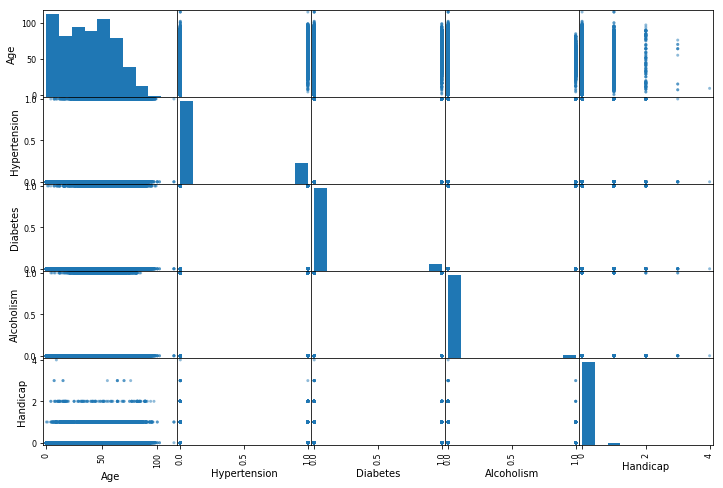

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["No-show","Age", "Hypertension", "Diabetes", "Alcoholism","Handicap","SchedPeriod"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.show()

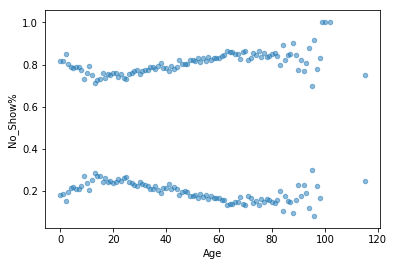

In [18]:
plot_df = train_set[['Age','No-show']].groupby(['Age','No-show']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('Age')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

plot_df.plot.scatter(x="Age", y="No_Show%", alpha=0.5)
plt.show()

In [19]:
from noshow_lib.helpers import *

def show_plot(attritbute):
    plot_df = train_set[[attritbute,'No-show']].groupby([attritbute,'No-show']).size().reset_index(name='Counts')
    plot_df['TotalAppointments'] = plot_df.groupby(attritbute)['Counts'].transform('sum')
    plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments']
    
    chart_title = attritbute + ' - No Show Chart'

    ShowBarPlot(data=plot_df, x=attritbute,y='No_Show%',hue='No-show',bins=30, 
           title=chart_title,
           rotation=30,figsize_x=20, figsize_y=10)

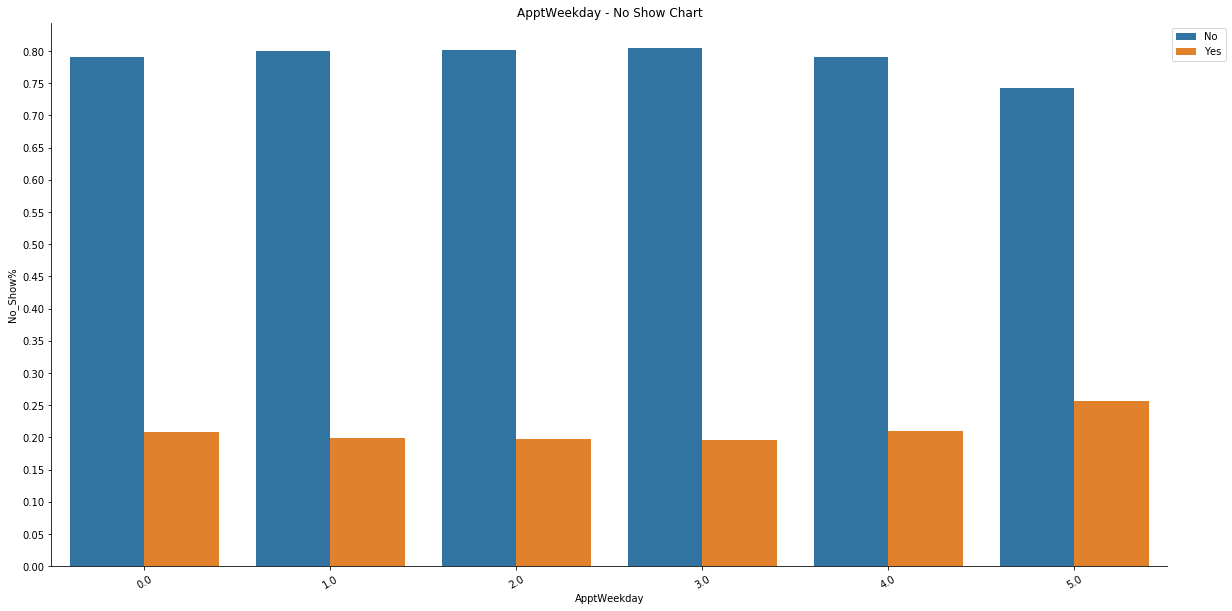

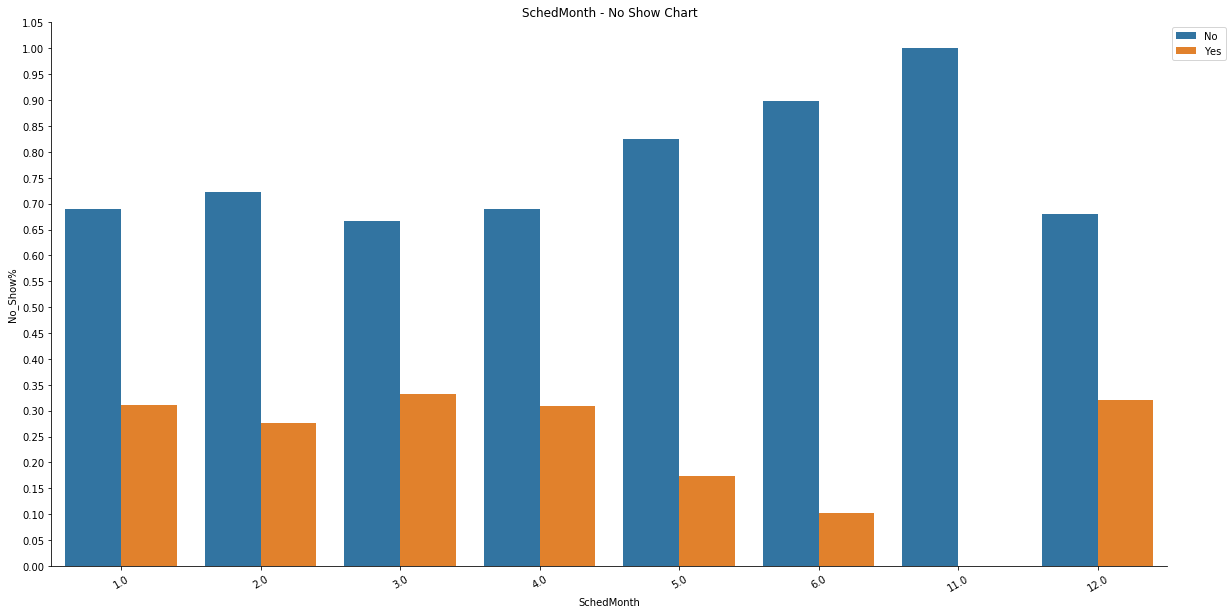

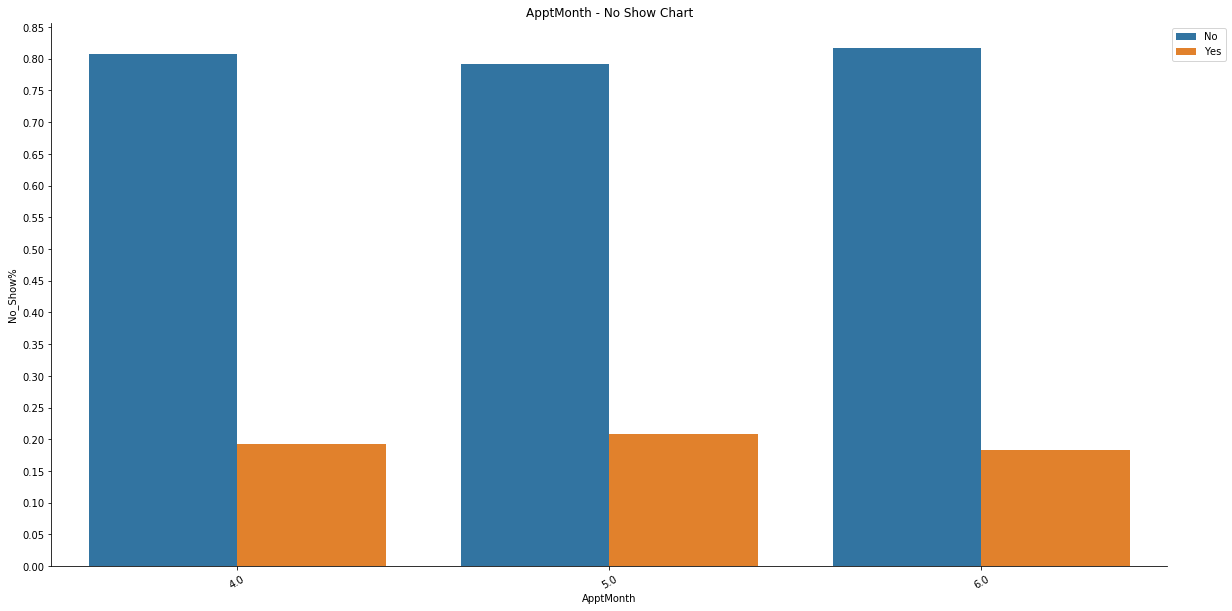

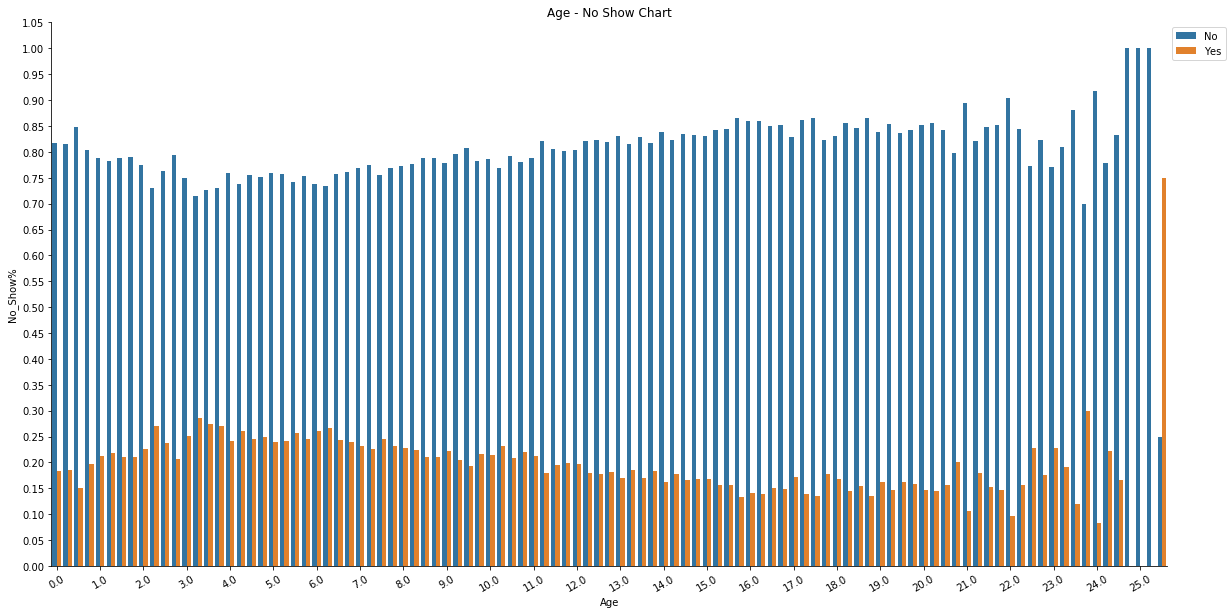

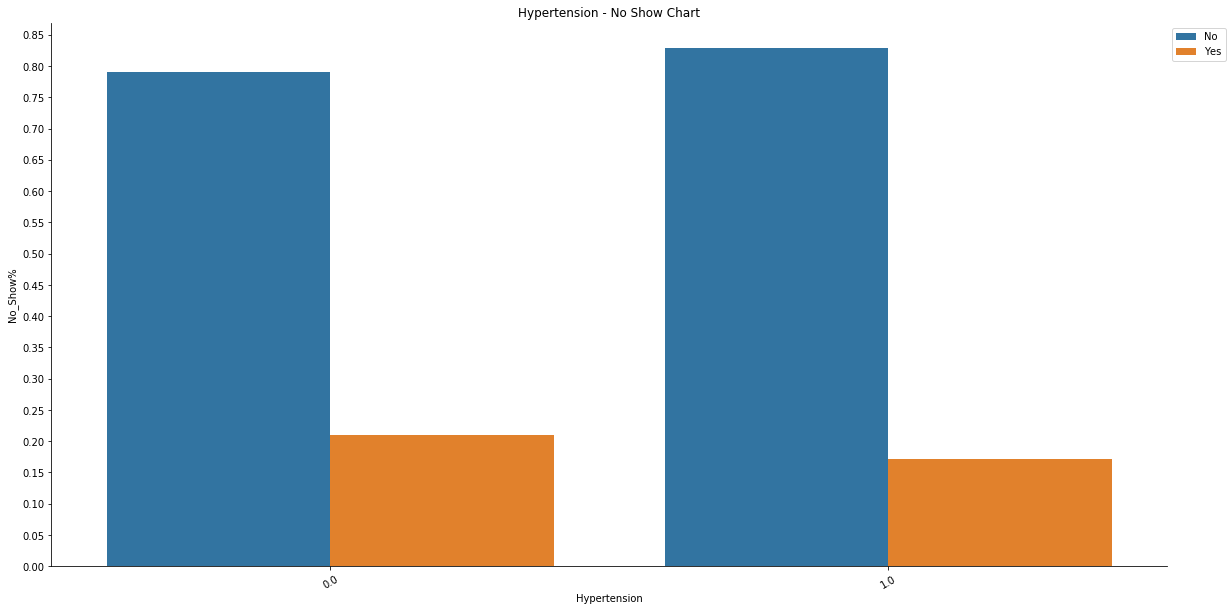

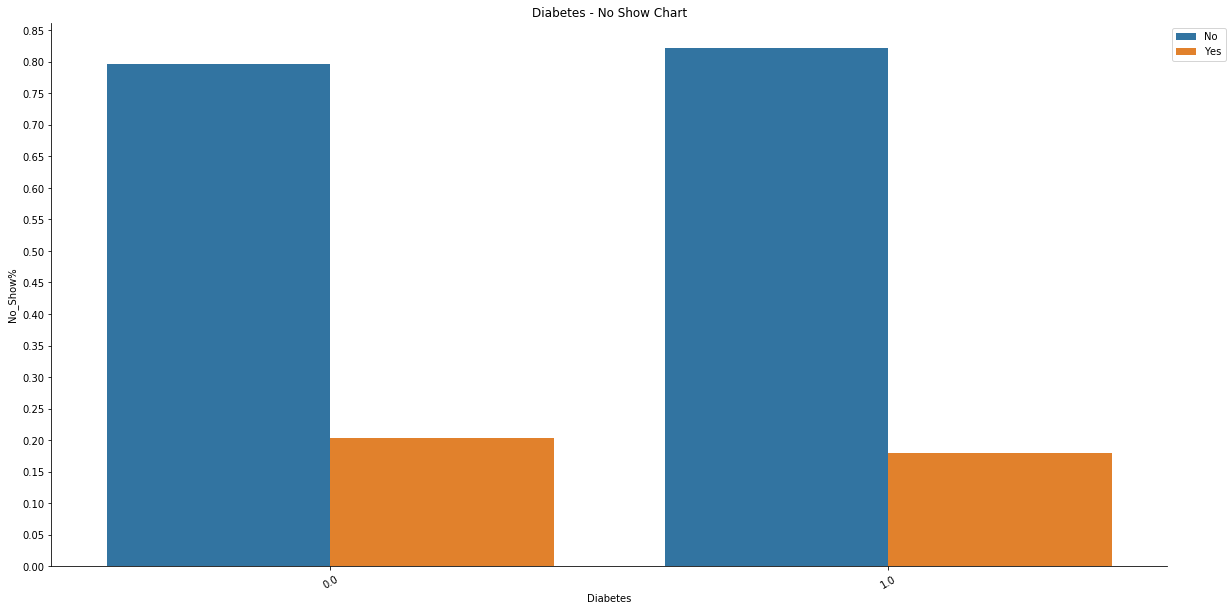

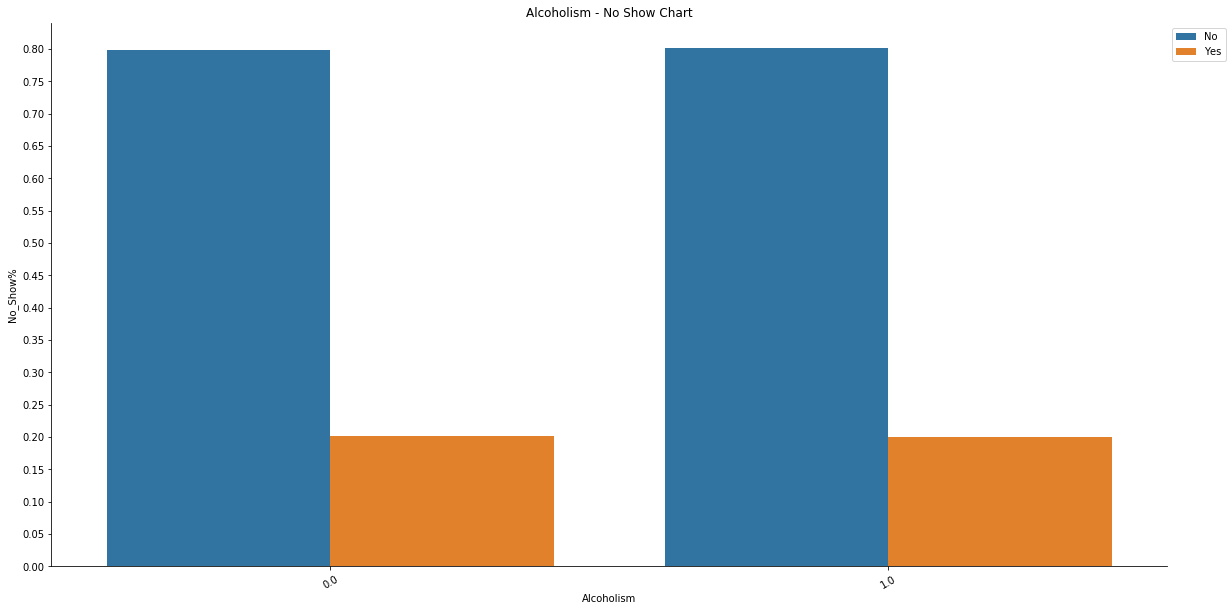

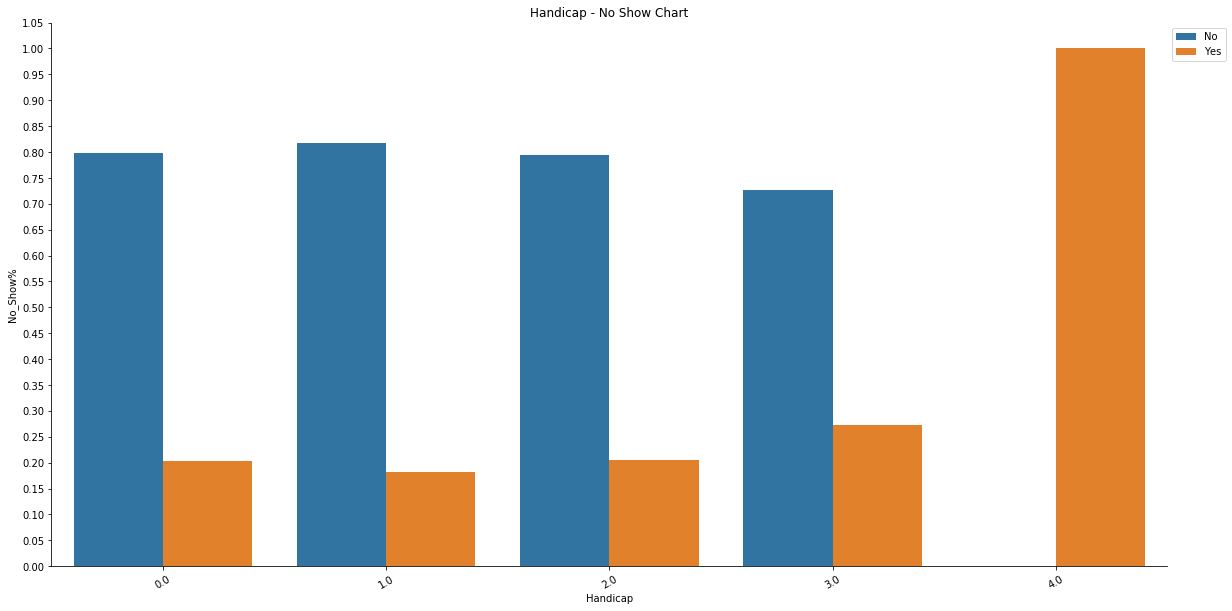

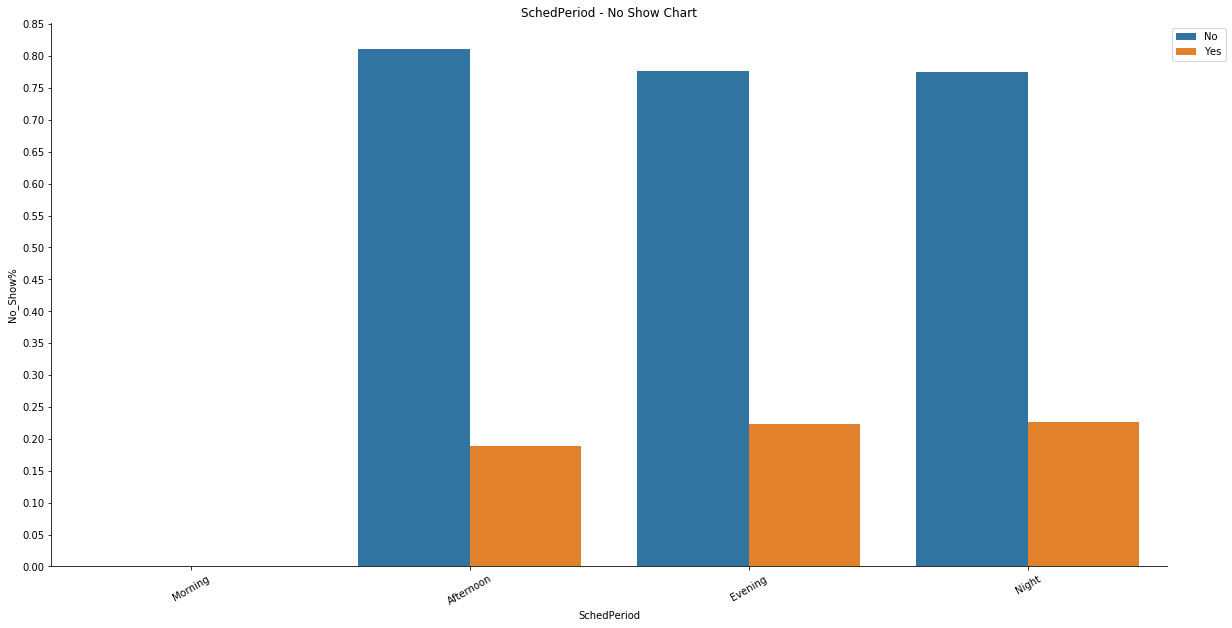

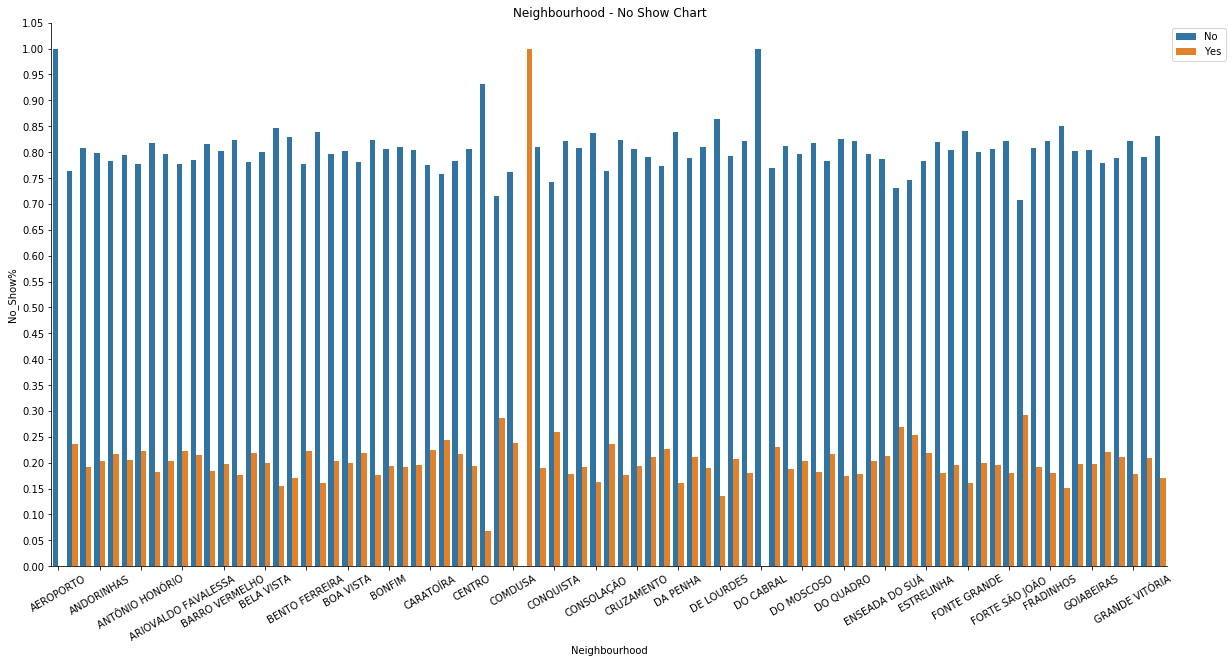

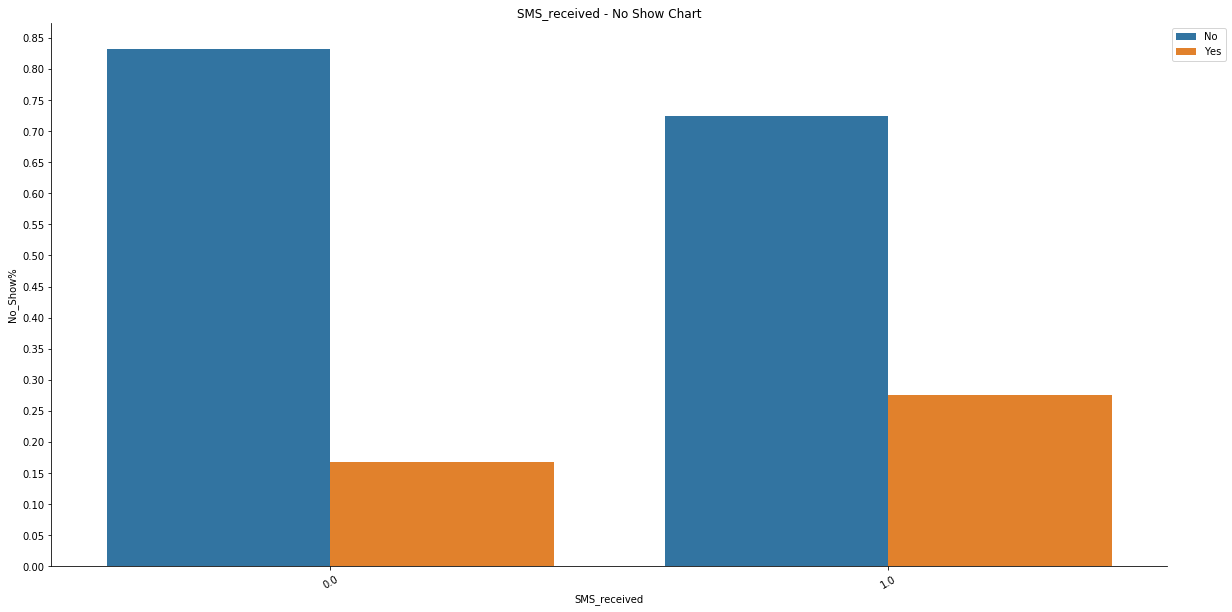

In [20]:
attributes = ["ApptWeekday","SchedMonth","ApptMonth","Age", "Hypertension", "Diabetes", "Alcoholism","Handicap","SchedPeriod",
              "Neighbourhood","SMS_received"]

for attribute in attributes:
    show_plot(attribute)

### Observation & Hypothesis
People most likely would miss appointment on Saturday.
- 0.0 is Monday
- ...
- 5.0 is Saturday

It looks like that people may miss appointment more in March and Dec. of a year.

Gender doesn't seems matter to determine whether miss appointment.

People who have Scholarship are most like missing appointment.

People who is not Hypertension will have a little higher chance to miss appointment.

People who doesn't have Diabetes will have a slightly highter chance of missing the appointment.

Alcoholism doesn't contribute to whether show or not show on appointment.

People who is SMS_received most likely will miss appointment.

People most likely will miss appointment when they are handcap 4.

People most likely will miss appointment at teens, 20s, and as old as 115 year old.

People are from the following nighbourhoods, most likely will miss the appointment:
- ILHA DAS CAIEIRAS
- SANTOS REIS

When schedule was made in evening and at night Period, most likely people won not show up for appointment

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [21]:
train_set.drop(["ApptYearMonthDay"], axis=1, inplace=True)
train_set.drop(["ApptYearMonth"], axis=1, inplace=True)
train_set.drop(["ApptDay"], axis=1, inplace=True)
train_set.drop(["SchedYearMonthDay"], axis=1, inplace=True)
train_set.drop(["SchedYearMonth"], axis=1, inplace=True)
train_set.drop(["SchedDay"], axis=1, inplace=True)
train_set.drop(["SchedSec"], axis=1, inplace=True)
train_set.drop(["hour"], axis=1, inplace=True)
train_set.drop(["minute"], axis=1, inplace=True)
train_set.drop(["second"], axis=1, inplace=True)
train_set.drop(["No-showTrans"], axis=1, inplace=True)
train_set.drop(["NeighbourhoodTran"], axis=1, inplace=True)
train_set.drop(["SchedPeriodTran"], axis=1, inplace=True)
train_set.drop(["GenderTrans"], axis=1, inplace=True)

In [22]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90526 entries, 65404 to 10278
Data columns (total 18 columns):
PatientId         90525 non-null float64
AppointmentID     90525 non-null float64
Gender            90525 non-null object
ScheduledDay      90525 non-null datetime64[ns]
AppointmentDay    90525 non-null datetime64[ns]
Age               90525 non-null float64
Neighbourhood     90525 non-null object
Scholarship       90525 non-null float64
Hypertension      90525 non-null float64
Diabetes          90525 non-null float64
Alcoholism        90525 non-null float64
Handicap          90525 non-null float64
SMS_received      90525 non-null float64
No-show           90525 non-null object
ApptMonth         90525 non-null float64
ApptWeekday       90525 non-null float64
SchedMonth        90525 non-null float64
SchedPeriod       90525 non-null category
dtypes: category(1), datetime64[ns](2), float64(12), object(3)
memory usage: 12.5+ MB


In [23]:
train_set["No-show"].value_counts()/ len(train_set)

No     0.798003
Yes    0.201986
Name: No-show, dtype: float64

In [24]:
import pandas as pd

def read_file(file_name):
    return pd.read_csv(file_name, 
                        dtype={ 'Age': np.float64
                              },
                       parse_dates = ['ScheduledDay', 'AppointmentDay'])

In [25]:
import pandas as pd

#write results to files and load it to test 
# Switch True/False to run as needed
SAVE_DATA = True

train_set_csv_file = PROCESSED_DATA_DIR + '/train_set.csv'
test_set_csv_file = PROCESSED_DATA_DIR + '/test_set.csv'
clean_data_csv_file = PROCESSED_DATA_DIR + '/clean_data_df.csv'

if SAVE_DATA:
    train_set.to_csv(train_set_csv_file, index=False)    
    test_set.to_csv(test_set_csv_file, index=False)
    clean_appt_df.to_csv(clean_data_csv_file, index=False)
    
    print('Data is saved')
else: 
    train_set = read_file(train_set_csv_file)
    test_set = read_file(test_set_csv_file)    
    clean_appt_df = read_file(clean_data_csv_file)   

    print('Data is loaded')

Data is saved


In [26]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, StandardScaler

# github.com/pandas-dev/sklearn-pandas
# install with pip install sklearn-pandas
from sklearn_pandas import DataFrameMapper

class DaysAheadTransform(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        daysahead = (X['AppointmentDay'] - X['ScheduledDay'])\
            .dt.days\
            .values\
            .astype('float64')
        return daysahead
    
daysahead_mapper = DataFrameMapper([
    (['AppointmentDay', 'ScheduledDay'], DaysAheadTransform())
], input_df=True)

daysahead_pipeline = Pipeline([
    ('mapper', daysahead_mapper),
    ('scaler', StandardScaler())
])

date_pipeline = FeatureUnion(transformer_list=[
    ('daysahead_pipeline', daysahead_pipeline)
])

numeric_attributes = ['Scholarship',
                      'Hypertension',
                      'Diabetes',
                      'Alcoholism',
                      'SMS_received'
                     ]

num_mapper = DataFrameMapper(list(zip(numeric_attributes, [None for x in numeric_attributes])))

df_mapper = DataFrameMapper([
    (['Age'], StandardScaler()),
    ('Gender', LabelBinarizer()),
    ('Neighbourhood', LabelBinarizer()),
    ('SchedPeriod', LabelBinarizer()),
    (['Handicap'], StandardScaler()),
    (['ApptMonth'], StandardScaler()),
    (['SchedMonth'], StandardScaler()),
    (['ApptWeekday'], StandardScaler())
])


full_pipeline = FeatureUnion(transformer_list=[
    ('date_pipeline', date_pipeline),
    ('num_mapper', num_mapper),
    ('df_mapper', df_mapper)
])


In [27]:
train_set_clean_df_labels = train_set['No-show'].copy()
train_set_clean_df = train_set.copy()
train_set_clean_df = train_set_clean_df.drop('No-show', axis=1)
train_set_clean_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ApptMonth,ApptWeekday,SchedMonth,SchedPeriod
65404,1.488564e+13,5546731.0,F,2016-04-05 17:14:48,2016-05-16,7.0,JARDIM CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,Evening
28379,9.129977e+12,5625339.0,F,2016-04-27 07:08:52,2016-05-02,66.0,REDENÇÃO,0.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,4.0,Afternoon
88543,8.188634e+13,5763694.0,F,2016-06-02 09:17:53,2016-06-03,70.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,6.0,4.0,6.0,Afternoon
440,8.366249e+13,5639495.0,F,2016-04-29 09:09:55,2016-04-29,25.0,SÃO BENEDITO,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,Afternoon
74934,4.535866e+13,5623265.0,F,2016-04-26 13:46:56,2016-05-06,9.0,SÃO PEDRO,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,Evening


In [28]:
SAVE_DATA = True

train_set_clean_df.dropna()

train_set_clean_csv_file = PROCESSED_DATA_DIR + '/train_set_clean_df.csv'

if SAVE_DATA:
    train_set_clean_df.to_csv(train_set_clean_csv_file, index=False)
    train_set_clean_df.isnull().values.any()

In [29]:
train_set_clean_df.dropna()

test_df = train_set_clean_df.copy()
test_df.reset_index()

test_df[test_df.isnull().any(axis=1)]

test_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ApptMonth,ApptWeekday,SchedMonth,SchedPeriod
65404,1.488564e+13,5546731.0,F,2016-04-05 17:14:48,2016-05-16,7.0,JARDIM CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,Evening
28379,9.129977e+12,5625339.0,F,2016-04-27 07:08:52,2016-05-02,66.0,REDENÇÃO,0.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,4.0,Afternoon
88543,8.188634e+13,5763694.0,F,2016-06-02 09:17:53,2016-06-03,70.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,6.0,4.0,6.0,Afternoon
440,8.366249e+13,5639495.0,F,2016-04-29 09:09:55,2016-04-29,25.0,SÃO BENEDITO,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,Afternoon
74934,4.535866e+13,5623265.0,F,2016-04-26 13:46:56,2016-05-06,9.0,SÃO PEDRO,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,Evening
23706,5.428828e+13,5540910.0,F,2016-04-05 07:29:32,2016-05-06,55.0,VILA RUBIM,0.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,Afternoon
90728,1.951441e+12,5751010.0,M,2016-05-31 09:35:41,2016-06-01,43.0,JABOUR,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,5.0,Afternoon
71986,6.716845e+12,5720821.0,F,2016-05-19 14:39:17,2016-05-20,31.0,SÃO CRISTÓVÃO,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,Evening
4977,8.275395e+12,5716237.0,F,2016-05-18 16:11:52,2016-05-20,19.0,CONSOLAÇÃO,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,Evening
87132,3.635119e+13,5754865.0,F,2016-05-31 18:04:48,2016-06-07,68.0,JARDIM CAMBURI,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,5.0,Night


In [30]:
train_set_clean_df.isnull().values.any()
 
#train_set_clean_df.isnull().any()

True

In [31]:
full_pipeline.fit(train_set_clean_df)
#noshow_mat = full_pipeline.transform(train_set_clean_df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').